In [1]:
import random
def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data_test = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
%matplotlib inline

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from ipywidgets import interact, interactive, fixed
#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

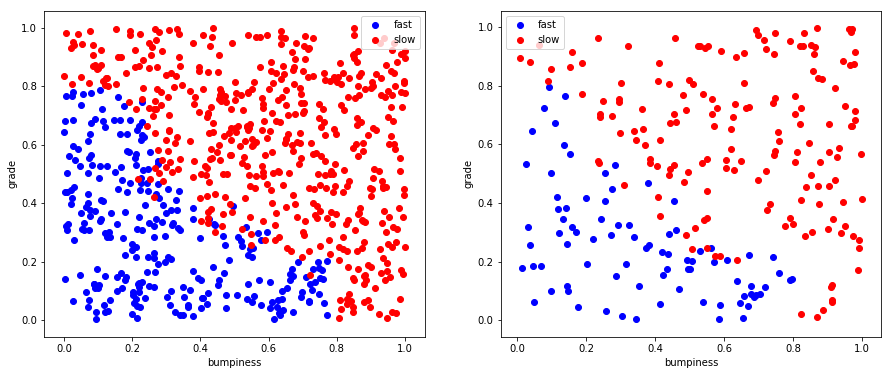

In [3]:
# data visualization
features_train, labels_train, features_test, labels_test = makeTerrainData()
features_train = np.asarray(features_train)
features_test = np.asarray(features_test)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(features_train[np.asarray(labels_train)==0,0],features_train[np.asarray(labels_train)==0,1],color='b',label="fast")
plt.scatter(features_train[np.asarray(labels_train)==1,0],features_train[np.asarray(labels_train)==1,1],color='r',label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.subplot(1,2,2)
plt.scatter(features_test[np.asarray(labels_test)==0,0],features_test[np.asarray(labels_test)==0,1],color='b',label="fast")
plt.scatter(features_test[np.asarray(labels_test)==1,0],features_test[np.asarray(labels_test)==1,1],color='r',label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")

tain accuracy =  0.932
test accuracy =  0.916


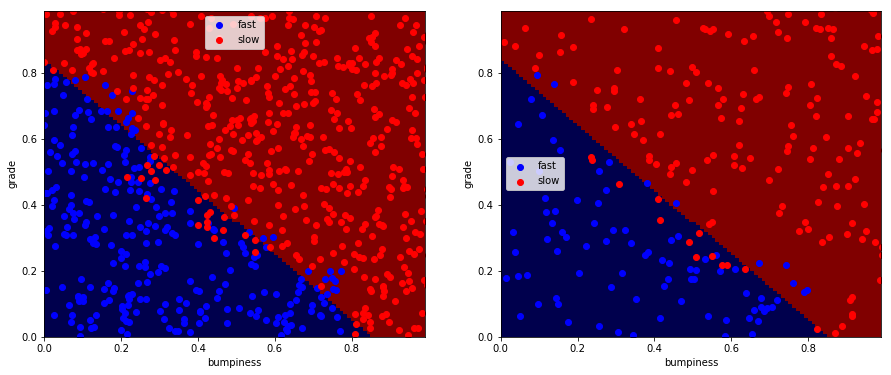

In [4]:
# logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()

penalty = ['l1', 'l2']

@interact
def LR_play(C:(-1.,10.)=1., penalty:penalty='l2'):
    clf = LogisticRegression(penalty=penalty,C=10**C)
    clf.fit(features_train, labels_train)
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    prettyPicture(clf, features_train, labels_train)
    plt.subplot(1,2,2)
    prettyPicture(clf, features_test, labels_test)
    
    pred = clf.predict(features_train)
    acc = accuracy_score(pred, labels_train)
    print("tain accuracy = ",acc)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred, labels_test)
    print("test accuracy = ",acc)

In [7]:
from sklearn.svm import SVC
features_train, labels_train, features_test, labels_test = makeTerrainData()
clf = SVC()
clf.fit(features_train, labels_train)
pred = clf.predict(features_train)
acc = accuracy_score(pred, labels_train)
print(acc)

0.924


tain accuracy =  0.978666666667
test accuracy =  0.94


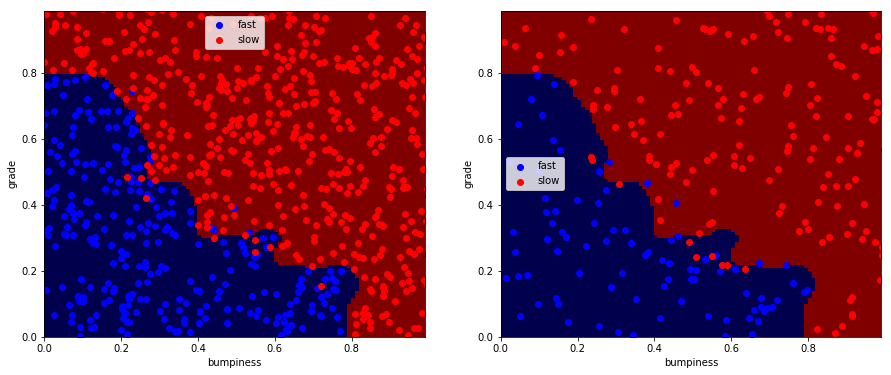

In [5]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

@interact
def SVM_play(C:(-1.,2.)=0., kernel:kernel='linear',gamma:(-2.,5.)=0.,degree:(1,9)=1):
    clf = SVC(C=10**C,kernel=kernel,degree=degree,gamma=10**gamma)
    clf.fit(features_train, labels_train)
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    prettyPicture(clf, features_train, labels_train)
    plt.subplot(1,2,2)
    prettyPicture(clf, features_test, labels_test)
    
    pred = clf.predict(features_train)
    acc = accuracy_score(pred, labels_train)
    print("tain accuracy = ",acc)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred, labels_test)
    print("test accuracy = ",acc)

tain accuracy =  1.0
test accuracy =  0.908


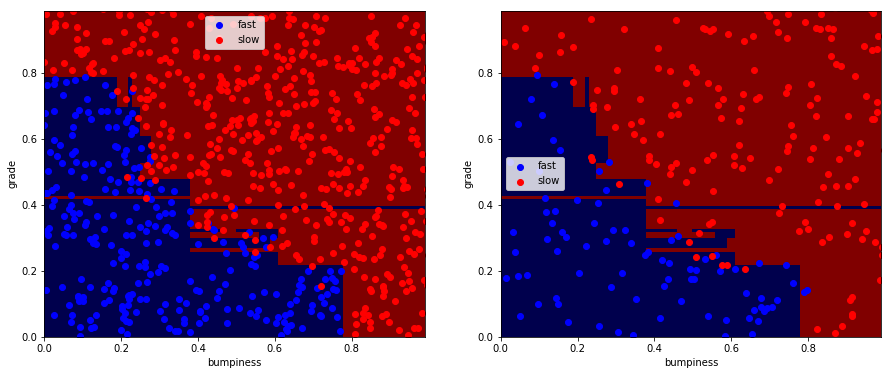

In [6]:
# decision tree

from sklearn import tree
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

@interact
def Tree_play(min_samples_split:(2,100)=2):
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(features_train, labels_train)
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    prettyPicture(clf, features_train, labels_train)
    plt.subplot(1,2,2)
    prettyPicture(clf, features_test, labels_test)
    
    pred = clf.predict(features_train)
    acc = accuracy_score(pred, labels_train)
    print("tain accuracy = ",acc)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred, labels_test)
    print("test accuracy = ",acc)